In [2]:
import pandas as pd
#matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

df = pd.read_csv('dados_limpos.csv',sep=",")


In [5]:
df = df.drop(['Unnamed: 0'],axis=1)
df

,isso,country,date,retail_recreation,grocery_pharmacy,parks,transit_stations,workplaces,residential,continent
0,AE,United Arab Emirates,15/02/2020,0.0,4.0,5.0,0.0,2.0,1.0,AS
1,AE,United Arab Emirates,16/02/2020,1.0,4.0,4.0,1.0,2.0,1.0,AS
2,AE,United Arab Emirates,17/02/2020,-1.0,1.0,5.0,1.0,2.0,1.0,AS
3,AE,United Arab Emirates,18/02/2020,-2.0,1.0,5.0,0.0,2.0,1.0,AS
4,AE,United Arab Emirates,19/02/2020,-2.0,0.0,4.0,-1.0,2.0,1.0,AS
...,...,...,...,...,...,...,...,...,...,...
230760,ZW,Zimbabwe,13/04/2020,-71.0,-63.0,-51.0,-83.0,-80.0,49.0,AF
230761,ZW,Zimbabwe,14/04/2020,-63.0,-53.0,-47.0,-78.0,-64.0,41.0,AF
230762,ZW,Zimbabwe,15/04/2020,-62.0,-50.0,-51.0,-77.0,-65.0,42.0,AF
230763,ZW,Zimbabwe,16/04/2020,-62.0,-50.0,-48.0,-77.0,-64.0,42.0,AF


In [6]:
df_EU = df.loc[df['continent']== 'EU']
df_EU

,isso,country,date,retail_recreation,grocery_pharmacy,parks,transit_stations,workplaces,residential,continent
2268,AT,Austria,15/02/2020,9.0,1.0,42.0,13.0,0.0,-2.0,EU
2269,AT,Austria,16/02/2020,15.0,21.0,42.0,12.0,1.0,-2.0,EU
2270,AT,Austria,17/02/2020,9.0,5.0,35.0,3.0,-4.0,0.0,EU
2271,AT,Austria,18/02/2020,8.0,5.0,40.0,2.0,-4.0,0.0,EU
2272,AT,Austria,19/02/2020,4.0,2.0,10.0,-1.0,-5.0,1.0,EU
...,...,...,...,...,...,...,...,...,...,...
72865,SK,Slovakia,13/04/2020,-94.0,-91.0,-11.0,-84.0,-88.0,32.0,EU
72866,SK,Slovakia,14/04/2020,-68.0,-13.0,-38.0,-54.0,-46.0,17.0,EU
72867,SK,Slovakia,15/04/2020,-66.0,-13.0,-16.0,-50.0,-42.0,17.0,EU
72868,SK,Slovakia,16/04/2020,-63.0,-13.0,10.0,-49.0,-42.0,14.0,EU


In [34]:
inputs = ['grocery_pharmacy','parks','transit_stations','workplaces','residential']
output = ['retail_recreation']

X = df_EU[inputs]
Y = df_EU[output]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=40)

In [41]:
mlp = MLPRegressor(hidden_layer_sizes=(16,16,16,16), activation='relu', solver='adam', max_iter=50000)
mlp.fit(X_train,Y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
print(mean_squared_error(Y_train,predict_train))
print(r2_score(Y_train,predict_train))

73.91944078035458
0.9406976917702066


In [43]:
print(mean_squared_error(Y_test,predict_test))
print(r2_score(Y_test,predict_test))

82.60554132552386
0.9328130268706005


C:\ProgramData\Miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


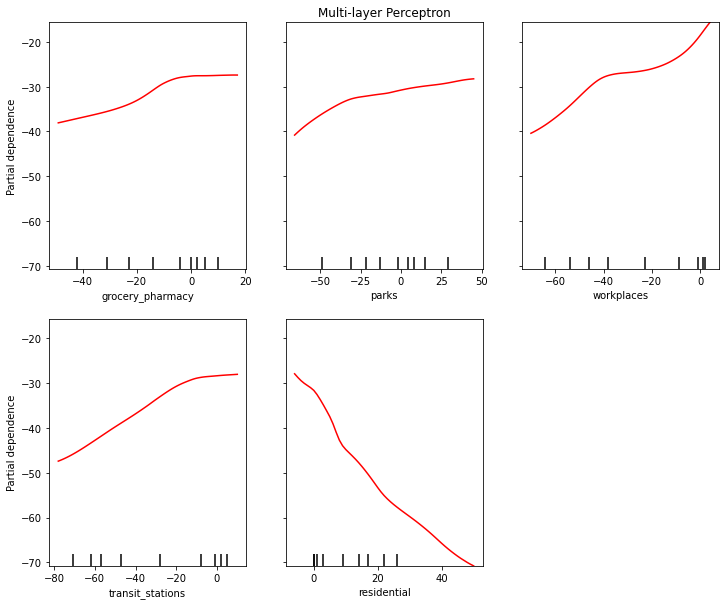

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import plot_partial_dependence
from sklearn.pipeline import make_pipeline


mlp = make_pipeline(StandardScaler(),
                    mlp)
mlp.fit(X, Y)

fig, ax = plt.subplots(figsize=(12, 10))
ax.set_title("Multi-layer Perceptron")
mlp_disp = plot_partial_dependence(mlp, X, ['grocery_pharmacy', 'parks', 'workplaces', 'transit_stations','residential'], ax=ax,
                                   line_kw={"c": "red"})